In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [9]:
##### AUCTION SETUP #####

# number of players
n_players = 2

# number of possible states
n_states = 5

# list of possible states: max value a bidder is willing to pay
states = np.arange(1, n_states+1)

# number of possible actions
n_actions = 4

# list of possible actions: % of max value a bidder is willing to pay [0;1]
actions = np.arange(1/n_actions,1.001,1/n_actions)

In [10]:
##### ALGORITHM SETUP #####

# initialize Q with zeros
Q = np.zeros((n_states,n_actions))

# initialize rewards with zeros
R = np.zeros((n_states,n_actions))

# Matrix that stores number of times a combination of state and action was used
N = np.zeros((n_states,n_actions))

# Resulting score for 100 episodes
score = 0

# Number of iterations
n_iter = 500000

In [11]:
# Choose the next move
def choose_move(state, epsilon):
    if np.random.rand() > epsilon:
        action = np.argmax(Q[state,:])
    else:
        action = np.random.choice(n_actions)
    return action


# Record the episode in the form of a sequence of (s,a,r)
def run_episode(epsilon):
    
    episode = []
    episode_bids = []
    
    for player in range(n_players):
        
        # state of the player
        state_index = np.random.choice(n_states)
        state_value = states[state_index]
        # print("Player ",player," state is: ",state_value,sep='')
    
        # actions of the player
        action_index = choose_move(state_index, epsilon)
        action_value = actions[action_index]
        # print("Player ",player," action is: ",action_value,sep='')
    
        # bid of the player
        bid = state_value*action_value
        # print("Player ",player," bid is: ",bid,sep='')
        
        # record the (s,a,r), though no reward yet
        episode.append([state_index, action_index, 0])
        
        # record the bid
        episode_bids.append((bid))
        

    # the highest bid
    bid_max = max(episode_bids)
    
    # bidders that offered the highest bid
    winners_list = [i for i, x in enumerate(episode_bids) if x == bid_max]
    
    # select the winner
    winner_index = np.random.choice(winners_list)
    
    # update the reward of a winner
    episode[winner_index][2] = states[episode[winner_index][0]] - bid_max
    
        
    return episode

In [12]:
##### RUN THE SIMULATION #####

for iteration in tqdm(range(n_iter)):
    
    # run the episode
    episode = run_episode(epsilon=10000/(iteration+1))
    
    # award equals to
    ep_reward = np.sum(episode, axis=0)[2]
    
    # update score
    score += ep_reward
    
    # choose (s,a) pairs from the episode
    sa_in_episode = set([(x[0],x[1]) for x in episode])
    
    # update Reward and Q matrices for new values of (s,a) we received from the episode
    for s,a in sa_in_episode:
        
        # select subset of episode, where (s,a) was played
        s_a_episode = []
        for result in episode:
            if result[0]==s and result[1]==a:
                s_a_episode.append(result)
        
        
        # average award from playing (s,a) per episode
        G = np.sum(s_a_episode, axis=0)[2] / len(s_a_episode)
        
        # Update reward matrix
        R[s,a] += G
        
        # Update matrix with the total number of times (s,a) was used
        N[s,a] += 1
        
        # Update Q matrix
        Q[s,a] = R[s,a] / N[s,a]
        
    # print score after 100,000 iterations    
    if (iteration+1)%100000 == 0: print("Score: ", score/100)
    
    # nulify the score
    if iteration%100 == 0: score = 0 

 20%|██████████████▎                                                         | 99090/500000 [00:07<00:29, 13520.42it/s]

Score:  1.71


 40%|████████████████████████████▎                                          | 199098/500000 [00:14<00:22, 13583.05it/s]

Score:  1.735


 60%|██████████████████████████████████████████▌                            | 299469/500000 [00:21<00:14, 13620.43it/s]

Score:  1.85


 80%|████████████████████████████████████████████████████████▊              | 399920/500000 [00:29<00:07, 13540.79it/s]

Score:  1.885


100%|██████████████████████████████████████████████████████████████████████▉| 499149/500000 [00:36<00:00, 13534.77it/s]

Score:  1.8575


100%|███████████████████████████████████████████████████████████████████████| 500000/500000 [00:36<00:00, 13534.92it/s]


The resulting Q matrix is:
[[ 0.    0.03  0.03  0.  ]
 [ 0.13  0.28  0.25  0.  ]
 [ 0.42  0.75  0.56  0.  ]
 [ 0.92  1.42  0.92  0.  ]
 [ 1.51  2.32  1.19  0.  ]]


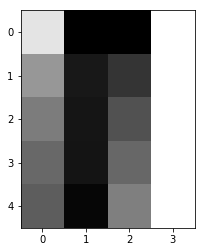

In [13]:
print('The resulting Q matrix is:')
print(np.round(Q,2))
plt.imshow(Q/np.sum(Q, axis=1, keepdims=True),cmap='binary', interpolation='none')
plt.show()

In [14]:
print('The best estimated strategy is:')
for i in range(n_states):
    print(states[i], '->', actions[np.argmax(Q, axis=1)[i]]*100, '%')
print('This guarantees an average award of', round(score/100,1), 'per 100 auctions')

The best estimated strategy is:
1 -> 50.0 %
2 -> 50.0 %
3 -> 50.0 %
4 -> 50.0 %
5 -> 50.0 %
This guarantees an average award of 1.9 per 100 auctions
